# Linear regression

### We are going to find out how to predict the profits in a chain of restaurants in different towns in America by the size of the population in each town

#### In the dataset we will use the population size and the profits have both deen divided by 10000.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### We have a text file . Use pd.read_table.

In [2]:
# There is no header.
df =pd.read_table('profit.txt',header = None)
print(df.head())
print(df.shape)

               0
0  6.1101,17.592
1  5.5277,9.1302
2  8.5186,13.662
3  7.0032,11.854
4  5.8598,6.8233
(97, 1)


#### Split the strings in to two columns using str.split with argument expand=True. Rename the columns as {0:'population',1:'profit'}

In [3]:
df = df.iloc[:,0].str.split(',',expand=True).rename(columns={0:'population',1:'profit'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   population  97 non-null     object
 1   profit      97 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


#### We need numerical data not strings! Make into floats

In [4]:
df = df.astype(float)

#### Population will be the independent variable (save as array X)  and profit will be dependent variable (save as vector y)

In [5]:
#df.values will convert dataframe to numpy object
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

#### Split into train and test sets (70:30)

In [6]:
from sklearn.model_selection import train_test_split

#random_state = 7 (seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7 )


#### Make histograms for each of X_train and y_train

Text(0.5, 0, 'profit')

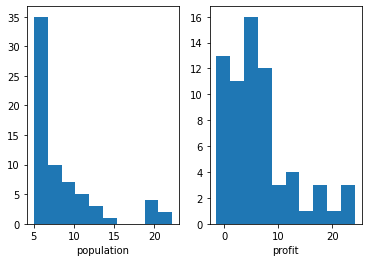

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(X_train)
ax1.set_xlabel('population')
ax2.hist(y_train)
ax2.set_xlabel('profit')

#### Make scatter plot for train set

Text(0, 0.5, 'profit')

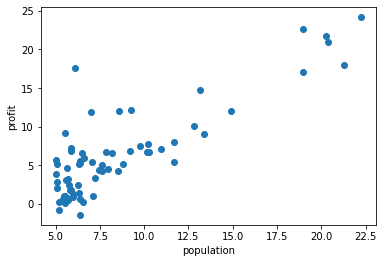

In [8]:
plt.scatter(X_train, y_train)
plt.xlabel('population')
plt.ylabel('profit')

#### Fit the linear regressor on the train set

In [9]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

#### Use lreg.predict on the train set to add regression line to scatter plot

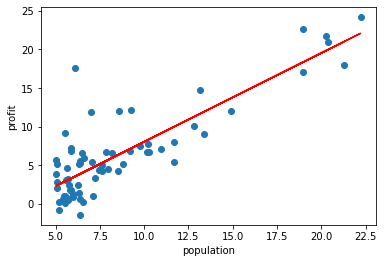

In [10]:

plt.scatter(X_train, y_train)
plt.xlabel('population')
plt.ylabel('profit')
plt.plot(X_train, lreg.predict(X_train), c='r')

#### Predict profits on test set. Make new plot for test data showing the test data, predictions and  regression line

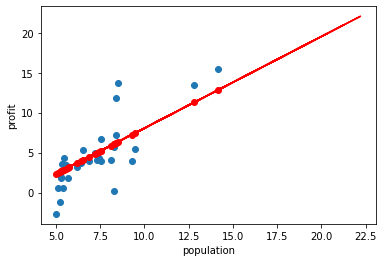

In [11]:
y_pred = lreg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test, y_pred, c='r')
plt.xlabel('population')
plt.ylabel('profit')
plt.plot(X_train, lreg.predict(X_train), c='r')

#### plot residuals

Text(0, 0.5, 'residuals')

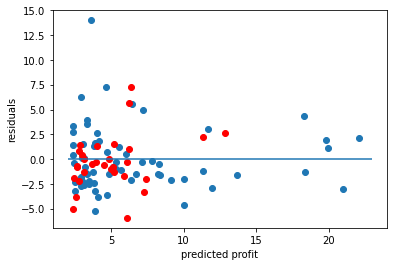

In [12]:
plt.scatter(lreg.predict(X_train),y_train-lreg.predict(X_train))
plt.hlines(y=0, xmin=2,xmax=23)
plt.scatter(y_pred, y_test-y_pred, c='r')
plt.xlabel('predicted profit')
plt.ylabel('residuals')

#### Calculate mse, mae and R^2

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, rmse,mae,r2)

7.1339274016837795 2.6709412950650524 1.9276677341323374 0.5875056517670413


#### Plot histogram with density plot of the test set residuals

<AxesSubplot:ylabel='Count'>

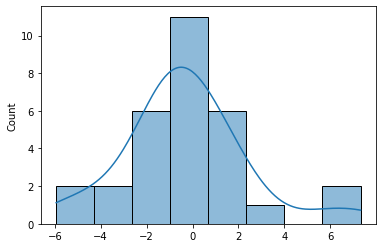

In [21]:
sns.histplot(y_test-y_pred,kde=True)